# Mục mới

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Dataset shape: (247950, 42)
Columns: ['Type', 'url_length', 'number_of_dots_in_url', 'having_repeated_digits_in_url', 'number_of_digits_in_url', 'number_of_special_char_in_url', 'number_of_hyphens_in_url', 'number_of_underline_in_url', 'number_of_slash_in_url', 'number_of_questionmark_in_url', 'number_of_equal_in_url', 'number_of_at_in_url', 'number_of_dollar_in_url', 'number_of_exclamation_in_url', 'number_of_hashtag_in_url', 'number_of_percent_in_url', 'domain_length', 'number_of_dots_in_domain', 'number_of_hyphens_in_domain', 'having_special_characters_in_domain', 'number_of_special_characters_in_domain', 'having_digits_in_domain', 'number_of_digits_in_domain', 'having_repeated_digits_in_domain', 'number_of_subdomains', 'having_dot_in_subdomain', 'having_hyphen_in_subdomain', 'average_subdomain_length', 'average_number_of_dots_in_subdomain', 'average_number_of_hyphens_in_subdomain', 'having_special_characters_in_subdomain', 'number_of_special_characters_in_subdomain', 'having_digits

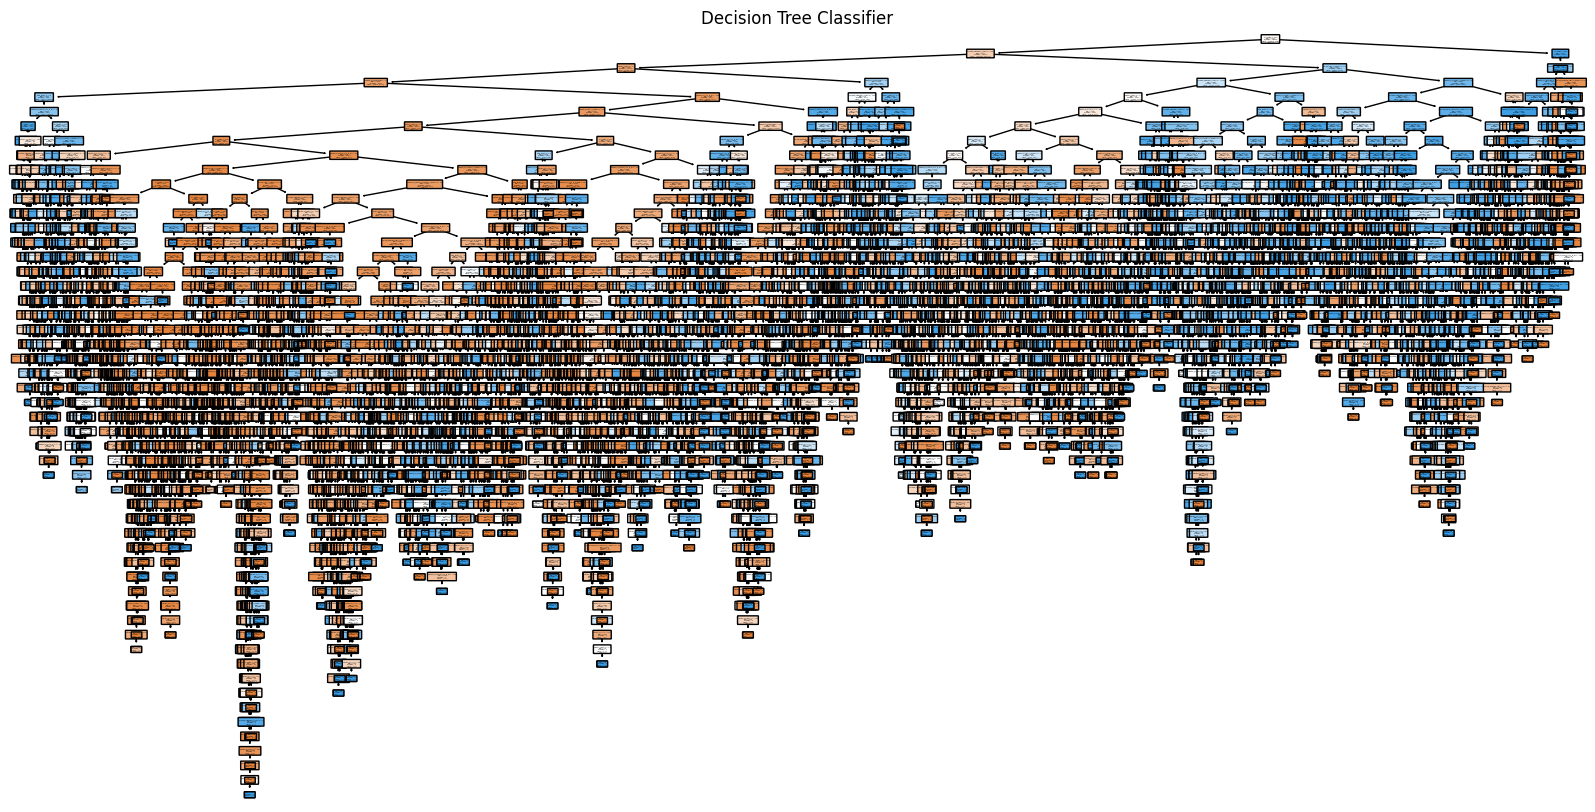

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Đọc dữ liệu từ file CSV
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset.csv')
print("Dataset shape:", data.shape)
print("Columns:", data.columns.tolist())
print("First 5 rows:")
print(data.head())

# 2. Xác định cột nhãn và đặc trưng
target_col = data.columns[0]
print("\nTarget column:", target_col)

# 3. Thống kê mô tả của cột nhãn
print("\nTarget column description:")
print(data[target_col].describe())

# 4. Xác định loại bài toán dựa vào cột nhãn
if np.issubdtype(data[target_col].dtype, np.number):
    unique_count = data[target_col].nunique()
    print("\nSố lượng giá trị duy nhất của target:", unique_count)
    # Quy ước: nếu số lượng giá trị duy nhất <= 10, xem như phân loại, ngược lại là hồi quy
    if unique_count <= 10:
        problem_type = "classification"
    else:
        problem_type = "regression"
else:
    problem_type = "classification"

print("\nAssumed problem type:", problem_type)

# 5. Tách dữ liệu: cột đầu tiên là nhãn, các cột còn lại là đặc trưng
X = data.iloc[:, 1:]
y = data[target_col]

# 6. Nếu bài toán phân loại nhưng target dạng số liên tục (với nhiều giá trị),
#    có thể chuyển đổi thành phân loại nhị phân dựa trên median
if problem_type == "classification":
    if np.issubdtype(y.dtype, np.number) and y.nunique() > 10:
        threshold = y.median()
        y = np.where(y < threshold, 0, 1)
        print("\nChuyển đổi target số liên tục thành 2 lớp theo median =", threshold)
        print("Unique classes after conversion:", np.unique(y, return_counts=True))

# 7. Chia dữ liệu thành tập huấn luyện và tập kiểm tra
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 8. Huấn luyện mô hình và đánh giá
if problem_type == "classification":
    # Huấn luyện Decision Tree Classifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.metrics import accuracy_score, classification_report

    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    print("\n--- Classification Results ---")
    print("Accuracy:", acc)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Vẽ cây quyết định
    from sklearn import tree
    plt.figure(figsize=(20,10))
    tree.plot_tree(clf, filled=True, feature_names=X.columns,
                   class_names=[str(c) for c in np.unique(y)], rounded=True)
    plt.title("Decision Tree Classifier")

elif problem_type == "regression":
    # Huấn luyện Decision Tree Regressor
    from sklearn.tree import DecisionTreeRegressor
    from sklearn.metrics import mean_squared_error, r2_score

    reg = DecisionTreeRegressor(random_state=42)
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print("\n--- Regression Results ---")
    print("Mean Squared Error:", mse)
    print("R^2 Score:", r2)

    # Vẽ cây quyết định
    from sklearn import tree
    plt.figure(figsize=(20,10))
    tree.plot_tree(reg, filled=True, feature_names=X.columns, rounded=True)
    plt.title("Decision Tree Regressor")
    plt.show()
    #Confusion Matrix